# Solving Differential Equations in Python

*Omjas Tripathi 2024-1-15*

Today we will be solving the Diffrential equations, $y"(t)=g$  and  $y"(t)=-mg-/γ y'(t)$ in Python! This was coded in python, and so I will take you along each step and each problem I had. Lets imagine we are to throw a baseball off a 30 m building. If we were to take an instant of time of when the ball was falling, could we predict the conditions that its in? We had the initial conditions of h= 30 and the three V~0 values  being -3,0, and 10.


 **What does the equation $ y"(t)=g $ show?**

This is a Second order linear diffrential equation, where $ y(t) $ is a function of time, and the quotation marks you see shows the second derivative of $ y $  with respect to $ t $, and g is a constant, representing acceleration due to gravity, which is 9.8 m/s. Solving this equation would involve finding the function $ y(t) $ that satisfies the relationship of the second derivative $ y(t) $ is g. This would mean integrating twice and incoporating the initial conditions given to us. Lets get rollin!

**How do we solve the equation y"(t)=g in Python?**

To start off, lets import the numpy library. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

`matplotlib.pyplot` generates graphs from the matplotlib library so now you know our solution will be a graph! Matplotlib website here:

https://matplotlib.org/ 

We move onto the next part of the code, which is 


In [19]:
def analytical_solution(t, g, y0, v0):
    return -0.5 * g * t**2 + v0 * t + y0

This Python function, `analytical_solution`, represents the analytical solution for the vertical position of an object in free fall under the influence of gravity. It calculates the position (y) at a given time (t) using the initial vertical position (y0), initial vertical velocity (v0), and gravitational acceleration (g).

Now, we move onto the next part.

In [36]:
# Given values
g = 30.0  # m/s^2
h = 30.0  # m
v0_values = [-3, 0, 10]  # Initial velocities


This section of the code defines the Given Values. Make sure to use [] when giving the set of initial velocities, as you [] are used to create lists, list comprehensions, and for selecting or retrieving items from a collection!

Almost there! Now we move forward and code in...

In [52]:
# Time points
t = np.linspace(0, 5, 100)  # Adjust the time range as needed

In this code snippet, it's creating an array of 100 time points (`t`) using NumPy's `linspace` function. The time points start from 0, go up to 5, and are evenly spaced. This array is often used to represent a time interval for analyzing or plotting data over that specific duration.

Hang on tight! After this one theres only one more snippet!

In [53]:
# Plot the analytical solutions
for v0 in v0_values:
    y = analytical_solution(t, g, h, v0)
    plt.plot(t, y, label=f'Initial Velocity: {v0} m/s')

This code is generating a plot for the analytical solution of the vertical position of an object in free fall for different initial velocities (`v0_values`). It iterates through each initial velocity, calculates the corresponding vertical position (`y`) using the `analytical_solution` function, and then plots it against time (`t`). Each plot is labeled with its corresponding initial velocity. The result is a visual representation of the object's vertical position over time for different initial velocities. 

Last one incoming!!!

In [54]:
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position vs Time for Different Initial Velocities')
plt.show()


This one is simple. It labels the X axis and Y axis, makes a legend. and gives a title! `plt.show()` makes a graph on the console. And there you go! We have finished graphing the solution to the Second order linear diffrential equation, y"(t)=g sucessfully in Python!! 

**What does the Equation $y"(t)=-mg-/γ y'(t)$ show?**

The differential equation $y''(t) = -mg-/γy'(t)$ represents the motion of an object under the influence of gravity $(mg)$ and air resistance $(/γy'(t))$. Here: $y(t)$ is the vertical position of the object. $y'(t)$ is the first derivative of $y(t)$ with respect to time, representing the velocity of the object. $y''(t)$ is the second derivative of $y(t)$, representing the acceleration of the object. The term -mg accounts for the gravitational force pulling the object downward, and -\γy'(t) represents the opposing force due to air resistance (\γ) being a positive constant and y'(t) being the velocity). This type of second-order linear ordinary differential equation is common in physics when describing the motion of objects subject to both gravitational and resistive forces. Solving this equation would provide the function y(t), which describes the vertical position of the object as a function of time.

**How do we graph the equation $y"(t)=-mg-/γ y'(t)$ in python?**

To kick it off, lets import the numpy library. This time, we wont be graphing. We will be doing a routine, which tells how long it takes for the baseball to reach the ground, with and without friction!!

In [2]:
import numpy as np
from scipy.integrate import odeint

Again, same as solving the last equation. If you are into coding, its highly likely you will use the `numpy` library!

In [5]:
# Function that returns dy/dt with friction
def model_with_friction(y, t, m, g, gamma):
    dydt = [y[1], -g - (gamma/m) * np.sign(y[1]) * y[1]**2]
    return dydt

This is defining a Python function, `model_with_friction`, which calculates the derivative of a vector [y, y']with respect to time (t) for a system with friction. The parameters are: - y[0] represents the position. y[1] represents the velocity. m is the mass of the object. - g is the gravitational acceleration. \γ is the friction coefficient. The function returns a list [y[1], -g - (γ/m) times (y[1]) times y[1]^2], where the first element is the velocity (y') and the second element is the acceleration. This formulation accounts for the gravitational force and a friction term proportional to the square of the velocity, with the sign function ensuring the correct direction of the friction force.

We are going to do something very similar next snippet!



In [ ]:
# Function that returns dy/dt without friction
def model_without_friction(y, t, m, g):
    dydt = [y[1], -g]
    return dydt


This one is the same as the previous snippet, just without friction! 

Onwards!!

In [ ]:
def find_time_of_impact(t, position):
    # Find the index when the position becomes zero or negative
    impact_indices = np.where(position <= 0)[0]

    if len(impact_indices) == 0:
        # If the ball doesn't reach the ground, return None
        return None

    # Take the first impact index
    impact_index = impact_indices[0]

    # Interpolate to get a more accurate estimate of the impact time
    impact_time = np.interp(0, position[impact_index-1:impact_index+1], t[impact_index-1:impact_index+1])

    return impact_time

This function, `find_time_of_impact`, takes arrays of time (`t`) and corresponding positions (`position`). It identifies the index when the position becomes zero or negative, indicating the time of impact with the ground. If the object doesn't reach the ground, it returns `None`. If impact occurs, it interpolates to provide a more accurate estimate of the impact time and returns this value.

The next snippet is fairly simple. 

In [ ]:
# Given values
m = 0.145  # mass of baseball in kg
g = 9.8  # acceleration due to gravity in m/s^2
gamma = 0.009  # friction coefficient
h = 30.0  # initial height in meters
v0_values = [-3, 0, 10]  # Initial velocities

This one just gives the initial values. There was a problem with finding the gamma value however, where the values I found on Google were not right, and it was like the ball was dropped trough a thick goo. I then put Stokes Law to use, and found a value of 0.009 according to values like cross-section area of the baseball, terminal velocity, and much more. 

Getting closer to the finish!

In [ ]:
# Time points
t = np.linspace(0, 10, 1000)

In this code snippet, it's creating an array of 100 time points (`t`) using NumPy's `linspace` function. The time points start from 0, go up to 5, and are evenly spaced. This array is often used to represent a time interval for analyzing or plotting data over that specific duration. The same thing was used in solving the previous equation!

Los Gehts! 


In [ ]:
# Plot the results for each initial velocity
for v0 in v0_values:
    # Solve the ODE with friction
    solution_with_friction = odeint(model_with_friction, [h, v0], t, args=(m, g, gamma))

    # Extract position and velocity for the scenario with friction
    position_with_friction = solution_with_friction[:, 0]
    velocity_with_friction = solution_with_friction[:, 1]

    # Plot the results for the scenario with friction
    plt.plot(t, position_with_friction, label=f'Position (with friction), V0={v0} m/s')
    plt.plot(t, velocity_with_friction, label=f'Velocity (with friction), V0={v0} m/s')

This code is creating plots for the position and velocity of the baseball experiencing friction for different initial velocities (`v0_values`). It uses the `odeint` function to numerically solve the ordinary differential equation (ODE) defined by the `model_with_friction` function. The results are then plotted over time (`t`) for each scenario with different initial velocities, both for position and velocity. Each plot is labeled with the corresponding initial velocity, showing how friction affects the baseballs's motion. 

Just one more!!


In [ ]:
# Find time of impact without friction
for v0 in v0_values:
    # Initial conditions
    y0 = [h, v0]  # initial position (m) and initial velocity (m/s)

    # Solve the ODE without friction
    sol_no_friction = odeint(model_without_friction, y0, t, args=(m, g))

    # Extract position
    position_no_friction = sol_no_friction[:, 0]

    # Find time of impact
    impact_time_no_friction = find_time_of_impact(t, position_no_friction)

    if impact_time_no_friction is not None:
        print(f'Without Friction, Initial Velocity: {v0} m/s - Time of Impact: {impact_time_no_friction:.2f} seconds')
    else:
        print(f'Without Friction, Initial Velocity: {v0} m/s - Ball does not reach the ground')

This one is the same as the previous one, just without friction. And thats it! You are done!! Below you will find the completed version of the solutions to both equations.

**Solution to the equation, $ y"(t)=g $ (Completed)**

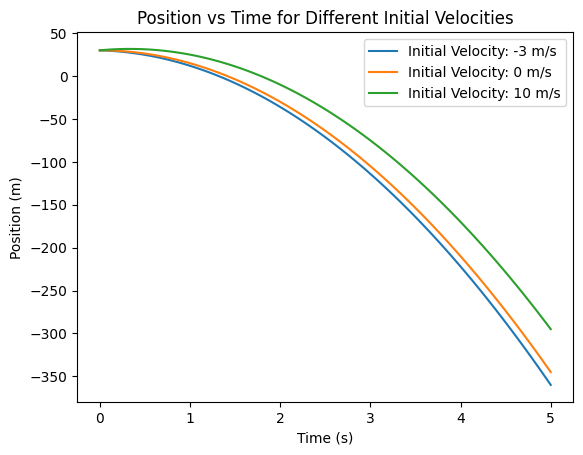

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def analytical_solution(t, g, y0, v0):
    return -0.5 * g * t**2 + v0 * t + y0

# Given values
g = 30.0  # m/s^2
h = 30.0  # m
v0_values = [-3, 0, 10]  # Initial velocities

# Time points
t = np.linspace(0, 5, 100)  # Adjust the time range as needed

# Plot the analytical solutions
for v0 in v0_values:
    y = analytical_solution(t, g, h, v0)
    plt.plot(t, y, label=f'Initial Velocity: {v0} m/s')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position vs Time for Different Initial Velocities')
plt.show()


**Solution to the equation, $y"(t)=-mg-/γ y'(t)$ (Completed)**

In [12]:
import numpy as np
from scipy.integrate import odeint

# Function that returns dy/dt with friction
def model_with_friction(y, t, m, g, gamma):
    dydt = [y[1], -g - (gamma/m) * np.sign(y[1]) * y[1]**2]
    return dydt

# Function that returns dy/dt without friction
def model_without_friction(y, t, m, g):
    dydt = [y[1], -g]
    return dydt

def find_time_of_impact(t, position):
    # Find the index when the position becomes zero or negative
    impact_indices = np.where(position <= 0)[0]

    if len(impact_indices) == 0:
        # If the ball doesn't reach the ground, return None
        return None

    # Take the first impact index
    impact_index = impact_indices[0]

    # Interpolate to get a more accurate estimate of the impact time
    impact_time = np.interp(0, position[impact_index-1:impact_index+1], t[impact_index-1:impact_index+1])

    return impact_time

# Given values
m = 0.145  # mass of baseball in kg
g = 9.8  # acceleration due to gravity in m/s^2
gamma = 0.009  # friction coefficient
h = 30.0  # initial height in meters
v0_values = [-3, 0, 10]  # Initial velocities

# Time points
t = np.linspace(0, 10, 1000)

# Find time of impact with friction
for v0 in v0_values:
    # Initial conditions
    y0 = [h, v0]  # initial position (m) and initial velocity (m/s)

    # Solve the ODE with friction
    sol_friction = odeint(model_with_friction, y0, t, args=(m, g, gamma))

    # Extract position
    position_friction = sol_friction[:, 0]

    # Find time of impact
    impact_time_friction = find_time_of_impact(t, position_friction)

    if impact_time_friction is not None:
        print(f'With Friction, Initial Velocity: {v0} m/s - Time of Impact: {impact_time_friction:.2f} seconds')
    else:
        print(f'With Friction, Initial Velocity: {v0} m/s - Ball does not reach the ground')

# Find time of impact without friction
for v0 in v0_values:
    # Initial conditions
    y0 = [h, v0]  # initial position (m) and initial velocity (m/s)

    # Solve the ODE without friction
    sol_no_friction = odeint(model_without_friction, y0, t, args=(m, g))

    # Extract position
    position_no_friction = sol_no_friction[:, 0]

    # Find time of impact
    impact_time_no_friction = find_time_of_impact(t, position_no_friction)

    if impact_time_no_friction is not None:
        print(f'Without Friction, Initial Velocity: {v0} m/s - Time of Impact: {impact_time_no_friction:.2f} seconds')
    else:
        print(f'Without Friction, Initial Velocity: {v0} m/s - Ball does not reach the ground')


With Friction, Initial Velocity: -3 m/s - Time of Impact: 3.00 seconds
With Friction, Initial Velocity: 0 m/s - Time of Impact: 3.27 seconds
With Friction, Initial Velocity: 10 m/s - Time of Impact: 4.45 seconds
Without Friction, Initial Velocity: -3 m/s - Time of Impact: 2.19 seconds
Without Friction, Initial Velocity: 0 m/s - Time of Impact: 2.48 seconds
Without Friction, Initial Velocity: 10 m/s - Time of Impact: 3.70 seconds
